# 1. Perkenalan

Nama : Aditya Vianseto<br>
Dataset : Wholesale Customers Dataset on Portugal<br>
Objective : Create Model to Clustering Data Customers and Classification of New Customer Data

URL Dataset Wholesale customers<br>
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#<br>

URL Deployment Heroku<br>
https://ftds-11-p1m2-aditya-vianseto.herokuapp.com/

## Dataset Description

- `Channel` = Customers Channel, Horeca (Hotel/Restaurant/Cafe) or Retail channel
- `Region` = Customers Region Lisbon, Oporto or Other
- `Fresh` = Customers annual spending on fresh products
- `Milk` = Customers annual spending on milk products
- `Grocery` = Customers annual spending on grocery products
- `Frozen` = Customers annual spending on frozen products
- `Detergents_Paper` = Customers annual spending on detergents and paper products
- `Delicassen` = Customers annual spending on delicatessen products

# 2. Import Libraries

In [356]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC
from yellowbrick.cluster import KElbowVisualizer
import joblib

Melakukan Import Library yang akan digunakan pada penelitian ini

# 3. Data Loading

In [357]:
# Load Dataset
raw_data = pd.read_csv('Wholesale customers data.csv')

# Duplicate Dataset
raw_data_copy = raw_data.copy()

Melakukan load dataset dari file `Wholesale customers data.csv` dan memasukannya kedalam variabel `raw_data` serta melakukan pembuatan data cadangan, untuk menghindari terjadinya kehilangan data setelah diolah dengan menduplikasi data serta menempatkannya pada variabel baru yaitu `raw_data_copy`

In [358]:
# Display All Columns of Data Frame Without Limitation
pd.set_option('max_columns', None)

# Display First Row of Dataset
print('============================= First Rows of Dataset =============================')
display(raw_data.head())

# Display Las Row of Dataset
print('\n\n=============================== Last Rows of Dataset ===============================')
display(raw_data.tail())

============================= First Rows of Dataset =============================


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185




=============================== Last Rows of Dataset ===============================


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


Menampilkan data teratas dan terbawah dari dataset yang digunakan

In [359]:
# Check Dataset Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Berdasarkan info diatas dari dataset yang digunakan dapat diketahui bahwa:
- Terdapat `440` entri data customer dan terdapat `8` kolom
- Tidak ada `Missing Values`
- `Data Type` pada `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, dan `Delicassen` lebih cocok jika bertipe `Float64` karena berisi nilai tentang jumlah uang

In [360]:
# Define Column to Change Data Type
changed_col = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

# Change Data Type
raw_data[changed_col] = raw_data[changed_col].astype('Float64')

# Rename Column
raw_data.rename(columns={'Delicassen':'Delicatessen'}, inplace=True)

# Re-Check Data Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             440 non-null    Float64
 3   Milk              440 non-null    Float64
 4   Grocery           440 non-null    Float64
 5   Frozen            440 non-null    Float64
 6   Detergents_Paper  440 non-null    Float64
 7   Delicatessen      440 non-null    Float64
dtypes: Float64(6), int64(2)
memory usage: 30.2 KB


Sukses merubah `Data Type` pada `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, dan `Delicassen` menjadi `Float64` karena berisi nilai tentang jumlah uang dan merubah nama kolom `Delicassen` menjadi `Delicatessen` karena adanya typo

In [361]:
# Describe Dataset

raw_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [362]:
raw_data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

Berdasarkan hasil diatas didapatkan bahwa rata-rata `Channel` customer berasal dari `Horeca (Hotel/Restaurant/Cafe)` dan rata-rata annual spending customer tertinggi pada `Fresh` product yaitu sebesar `12000.29$` / tahun yang dilanjutkan dengan `Grocery` product dengan rata-rata annual spending customer sebesar `7951.28$` / tahun. Dapat diasumsikan bahwa sebagian besar masyarakat dan turis asing yang data ke Portugal lebih gemar membeli `Fresh` product dan `Grocery`.

# 4.Exploratory Data Analysis (EDA)

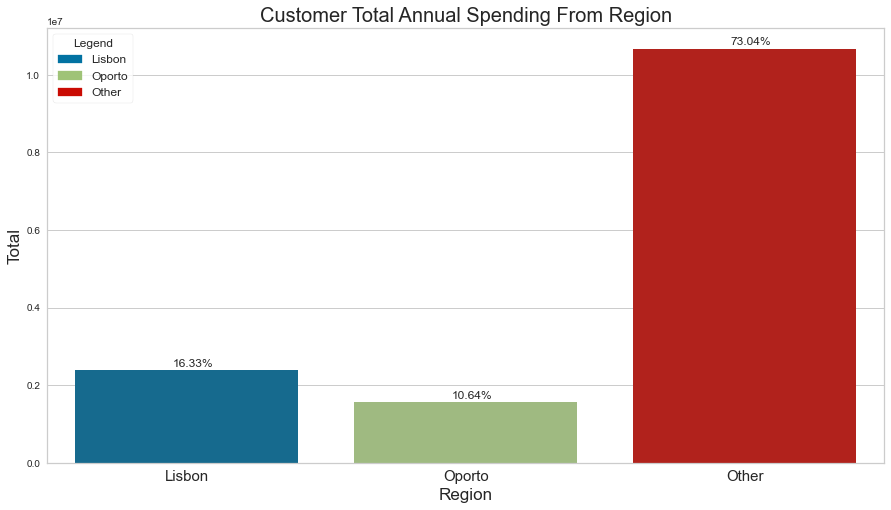

Customer Count
Lisbon =  77
Oporto =  47
Other  =  316


In [363]:
# Check Total Customer Annual Spending From Every Channel

prdct = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
reg_total = pd.DataFrame({'Total':[raw_data[raw_data.Region==1][prdct].sum().sum(),raw_data[raw_data.Region==2][prdct].sum().sum(),
                                   raw_data[raw_data.Region==3][prdct].sum().sum()]})
plt.figure(figsize=(15,8))
total_vis = sns.barplot(x=reg_total.index, y=reg_total.Total)
plt.xticks([0,1,2],['Lisbon','Oporto','Other'], fontsize=15)
plt.title('Customer Total Annual Spending From Region', fontsize=20)
plt.ylabel('Total', fontsize=17)
plt.xlabel('Region', fontsize=17)
patches1 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in total_vis.get_xticklabels())]
plt.legend(frameon=True,title='Legend',handles=patches1, fontsize=12)
for bar in total_vis.patches:
   total_vis.annotate('{:.2%}'.format(bar.get_height()/reg_total.Total.sum()), (bar.get_x()+0.35, bar.get_height()+100000))
plt.show()
print('Customer Count')
print('Lisbon = ',raw_data.Region.value_counts()[1])
print('Oporto = ',raw_data.Region.value_counts()[2])
print('Other  = ',raw_data.Region.value_counts()[3])

Berdasarkan hasil diatas dapat disimpulkan bahwa Customer terbanyak ada pada `Region` Other, dan yang paling sedikit pada Oporto

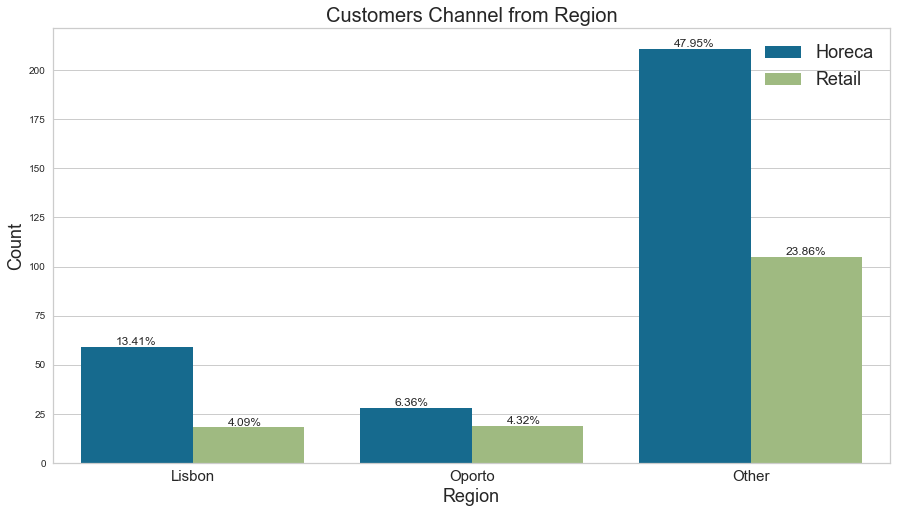

Customer Count
Lisbon = 59 (Horeca) and 18 (Retail)
Oporto = 28 (Horeca) and 19 (Retail)
Other = 211 (Horeca) and 105 (Retail)


In [364]:
# Count Customers Channel from Each Region

plt.figure(figsize=(15,8))
countplot = sns.countplot(x="Region", hue="Channel", data=raw_data)
plt.title('Customers Channel from Region', fontsize=20)
plt.legend(labels=['Horeca','Retail'], fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xlabel('Region',fontsize=18)
countplot.set_xticklabels(['Lisbon','Oporto','Other'], fontsize=15)

for bar in countplot.patches:
   countplot.annotate('{:.2%}'.format(bar.get_height()/len(raw_data)), (bar.get_x()+0.125, bar.get_height()+1))
plt.show()
print('Customer Count')
print(f'Lisbon = {raw_data[raw_data.Region==1].Channel.value_counts()[1]} (Horeca) and\
 {raw_data[raw_data.Region==1].Channel.value_counts()[2]} (Retail)')
print(f'Oporto = {raw_data[raw_data.Region==2].Channel.value_counts()[1]} (Horeca) and\
 {raw_data[raw_data.Region==2].Channel.value_counts()[2]} (Retail)')
print(f'Other = {raw_data[raw_data.Region==3].Channel.value_counts()[1]} (Horeca) and\
 {raw_data[raw_data.Region==3].Channel.value_counts()[2]} (Retail)')

Berdasarkan hasil diatas dapat disimpulkan bahwa:
- Lebih dominan customer yang berasal dari channel `Horeca` dibandingkan `Retail` di setiap Region
- Dapat diasumsikan bahwa sebagian besar customer di Portugal merupakan turis dan masyarakat yang lebih gemar bertransaksi di `Channel` `Horeca`

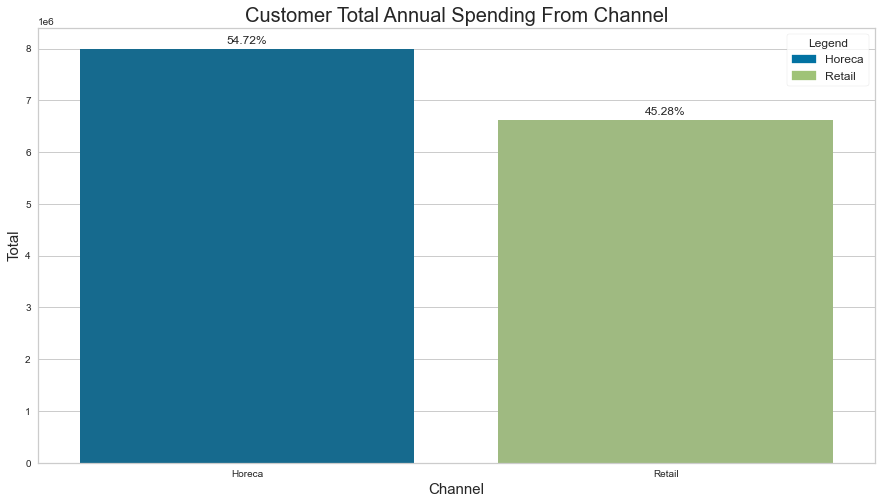

Customer Count
Horeca =  298
Retail =  142


In [365]:
# Check Total Customer Annual Spending From Every Channel

total = pd.DataFrame({'Total':[raw_data[raw_data.Channel==1][prdct].sum().sum(),raw_data[raw_data.Channel==2][prdct].sum().sum()]})
plt.figure(figsize=(15,8))
total_vis = sns.barplot(x=total.index, y=total.Total)
plt.xticks([0, 1],['Horeca','Retail'])
plt.title('Customer Total Annual Spending From Channel', fontsize=20)
plt.ylabel('Total', fontsize=15)
plt.xlabel('Channel', fontsize=15)
patches1 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in total_vis.get_xticklabels())]
plt.legend(frameon=True,title='Legend',handles=patches1, fontsize=12)
for bar in total_vis.patches:
   total_vis.annotate('{:.2%}'.format(bar.get_height()/total.Total.sum()), (bar.get_x()+0.35, bar.get_height()+100000))
plt.show()
print('Customer Count')
print('Horeca = ',raw_data.Channel.value_counts()[1])
print('Retail = ',raw_data.Channel.value_counts()[2])

Berdasarkan hasil diatas dapat diketahui bahwa customer lebih banyak spending pada `Channel` Horeca dengan total annual spend sebesar `54.72%` sedangkan untuk `Channel` Retail hanya `45.28%` dimana hal tersebut disebabkan oleh lebih banyaknya customer pada `Channel` Horeca daripada Retail. Diasumsikan customer pada `Channel` Horeca adalah gabungan dari masyarakat dan turis

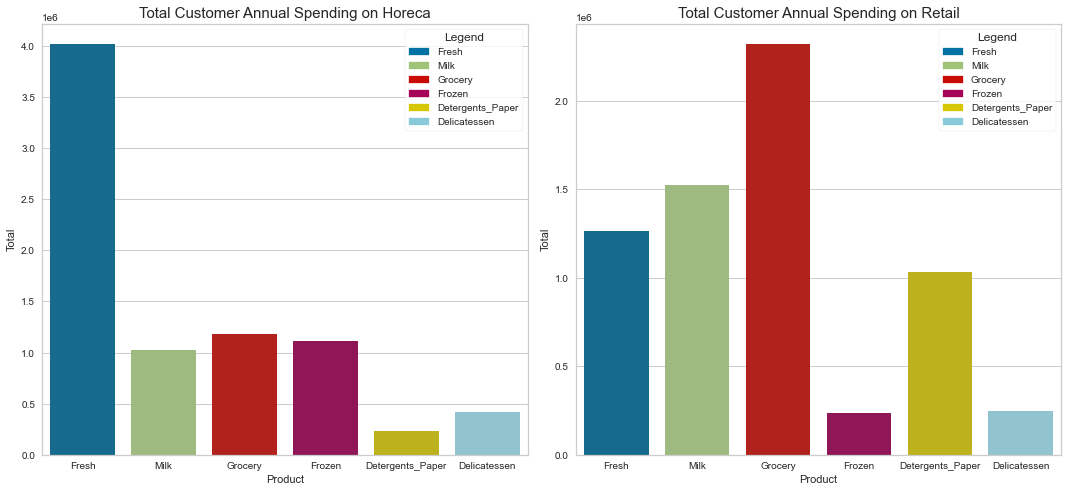

In [366]:
# Check Total Customer Annual Spending on Product for Every Channel

chnl_1 = pd.DataFrame(raw_data[raw_data.Channel==1][prdct].sum())
chnl_2 = pd.DataFrame(raw_data[raw_data.Channel==2][prdct].sum())
fig1, ax1 = plt.subplots(figsize=(15, 7), ncols=2)
chnl_1_vis = sns.barplot(x=chnl_1.index, y=chnl_1[0], ax=ax1[0])
patches1 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in chnl_1_vis.get_xticklabels())]
ax1[0].legend(frameon=True,title='Legend',handles=patches1)
ax1[0].set_title('Total Customer Annual Spending on Horeca', fontsize=15)
ax1[0].set_ylabel('Total')
ax1[0].set_xlabel('Product')

chnl_2_vis = sns.barplot(x=chnl_2.index, y=chnl_2[0], ax=ax1[1])
patches2 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in chnl_2_vis.get_xticklabels())]
ax1[1].legend(frameon=True,title='Legend',handles=patches2)
ax1[1].set_title('Total Customer Annual Spending on Retail', fontsize=15)
ax1[1].set_ylabel('Total')
ax1[1].set_xlabel('Product')

fig1.tight_layout()
plt.show()

Berdasarkan hasil diatas dapat diketahui bahwa:
- Pada `Channel` Horeca, total customer annual spending pada produk `Fresh` lah yang paling besar, dan untuk produk yang lainnya terlampau jauh dibawahnya (dibawah dari `50%` total anual spending pada produk `Fresh`)
- Pada `Channel` Retail, total customer annual spending pada produk `Grocery` lah yang paling besar, dimana total annual spending pada produk `Fresh`, `Milk`, dan `Detergen_Paper` tidak terlalu jauh perbedaannya, namun produk `Frozen` dan `Delicatesseen` memiliki total customer annual spending yang paling rendah

Hal ini sebanding dengan tujuan penjualan masing-masing `Channel` dimana Horeca lebih menjual terhadap produk-produk yang siap diolah untuk disajikan sedangkan Retail lebih menjual terhadap produk kebutuhan sehari-hari

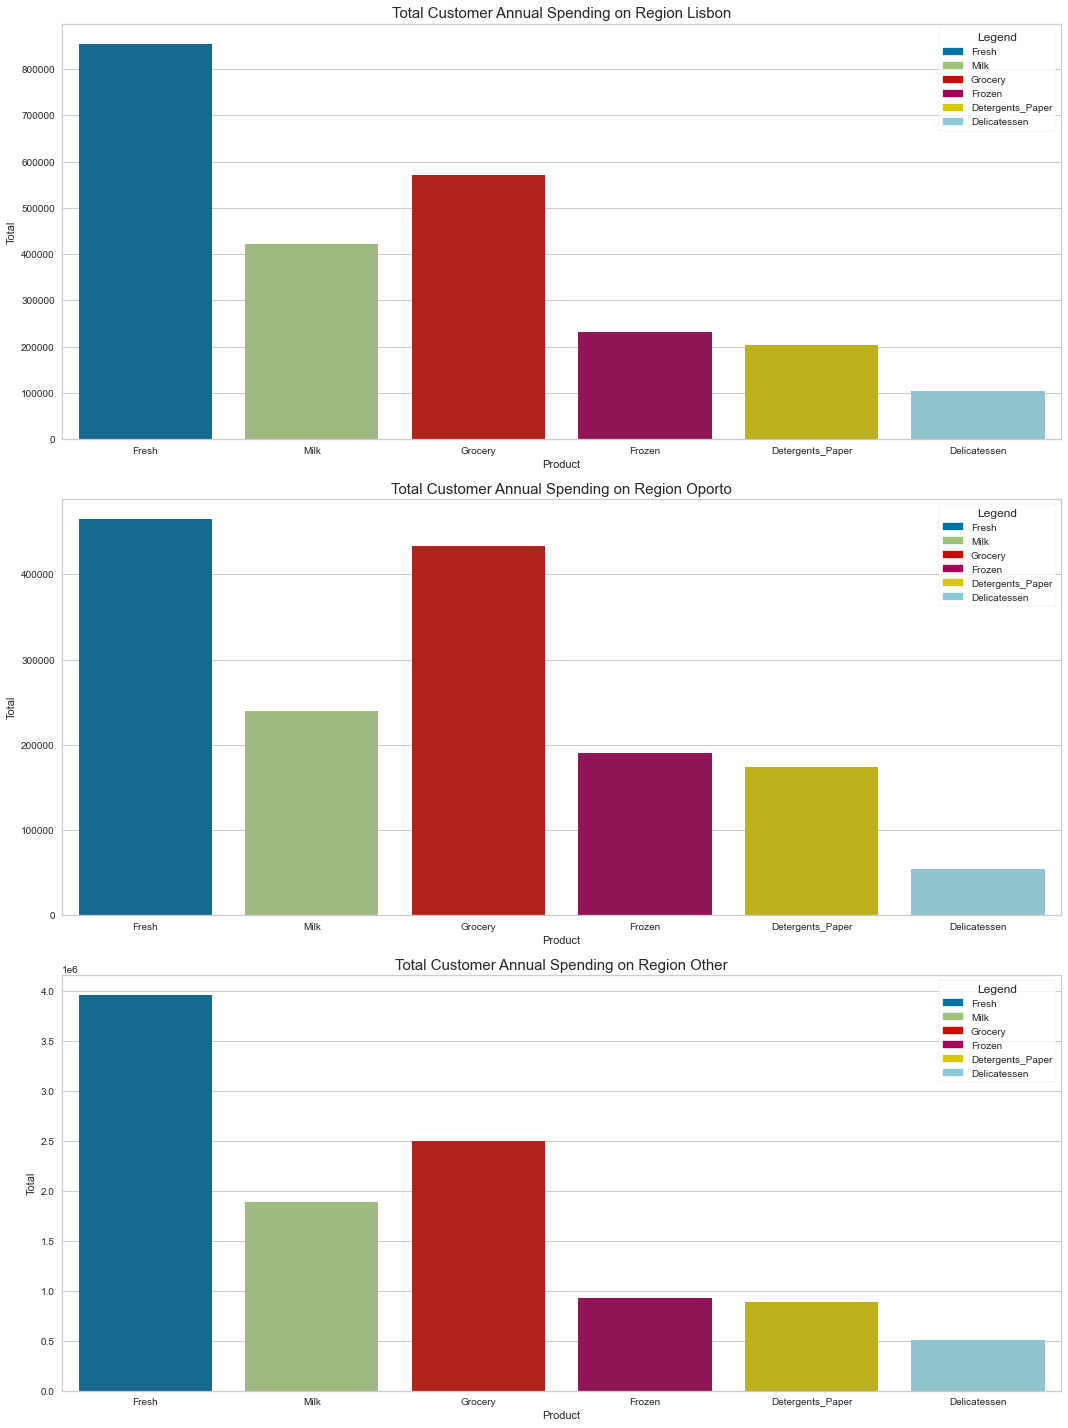

In [367]:
# Check Total Customer Annual Spending on Product for Every Region

reg_1 = pd.DataFrame(raw_data[raw_data.Region==1][prdct].sum())
reg_2 = pd.DataFrame(raw_data[raw_data.Region==2][prdct].sum())
reg_3 = pd.DataFrame(raw_data[raw_data.Region==3][prdct].sum())
fig2, ax2 = plt.subplots(figsize=(15, 20), nrows=3)
reg_1_vis = sns.barplot(x=reg_1.index, y=reg_1[0], ax=ax2[0])
patches3 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in reg_1_vis.get_xticklabels())]
ax2[0].legend(frameon=True,title='Legend',handles=patches3)
ax2[0].set_title('Total Customer Annual Spending on Region Lisbon', fontsize=15)
ax2[0].set_ylabel('Total')
ax2[0].set_xlabel('Product')

reg_2_vis = sns.barplot(x=reg_2.index, y=reg_2[0], ax=ax2[1])
patches4 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in reg_2_vis.get_xticklabels())]
ax2[1].legend(frameon=True,title='Legend',handles=patches4)
ax2[1].set_title('Total Customer Annual Spending on Region Oporto', fontsize=15)
ax2[1].set_ylabel('Total')
ax2[1].set_xlabel('Product')

reg_3_vis = sns.barplot(x=reg_3.index, y=reg_3[0], ax=ax2[2])
patches5 = [mpl.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in reg_3_vis.get_xticklabels())]
ax2[2].legend(frameon=True,title='Legend',handles=patches5)
ax2[2].set_title('Total Customer Annual Spending on Region Other', fontsize=15)
ax2[2].set_ylabel('Total')
ax2[2].set_xlabel('Product')

fig2.tight_layout()
plt.show()

Berdasarkan hasil diatas dapat diketahui bahwa produk `Fresh` memiliki customer annual spending terbesar disetiap `Region` sedangkan produk `Delicatessen` selalu menjadi yang terendah, namun pada `Region` Oporto untuk customer annual spending produk `Grocery` hampir menyamai produk `Fresh`

# 5. Data Preprocessing

## 5.1. Handling Missing Values

In [368]:
# Check Missing Values
for col in raw_data.columns:
    print(f'Missing Values on {col} : {raw_data[col].isna().sum()} ({round(raw_data[col].isna().sum()/len(raw_data)*100,2)} %)')

Missing Values on Channel : 0 (0.0 %)
Missing Values on Region : 0 (0.0 %)
Missing Values on Fresh : 0 (0.0 %)
Missing Values on Milk : 0 (0.0 %)
Missing Values on Grocery : 0 (0.0 %)
Missing Values on Frozen : 0 (0.0 %)
Missing Values on Detergents_Paper : 0 (0.0 %)
Missing Values on Delicatessen : 0 (0.0 %)


Berdasarkan hasil diatas, dapat diketahui bahwa tidak terdapat `Missing Values`

## 5.2. Clustering

In [369]:
# Create Data for Clustering
data_cls = raw_data.copy()

Membuat duplikasi data yang akan digunakan khusus untuk proses Clustering

### 5.2.1 Handling Outlier

In [370]:
# Create Function for Check Data Distribution and Check Data Outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


Column Fresh (Skewness 2.56)


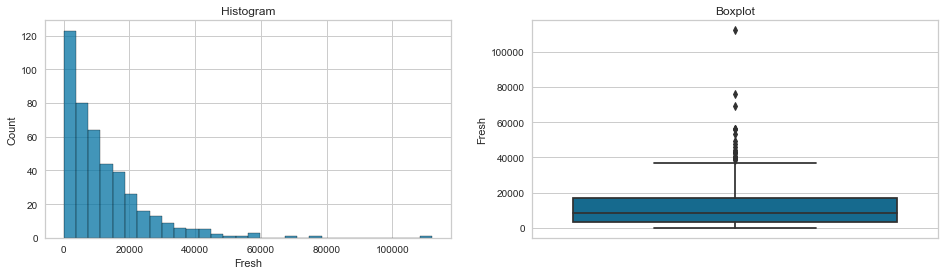


Column Milk (Skewness 4.05)


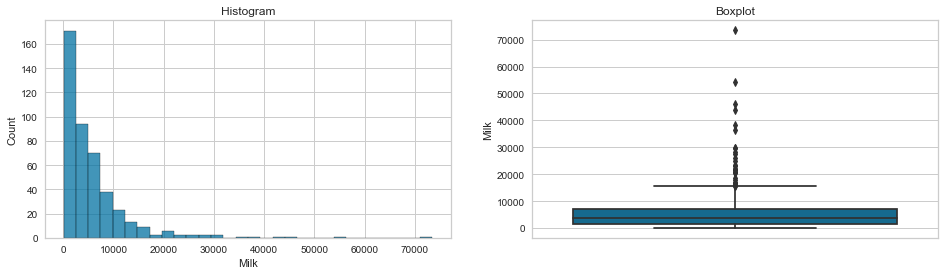


Column Grocery (Skewness 3.59)


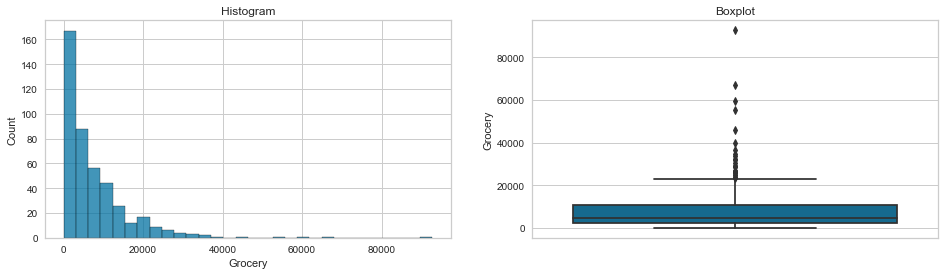


Column Frozen (Skewness 5.91)


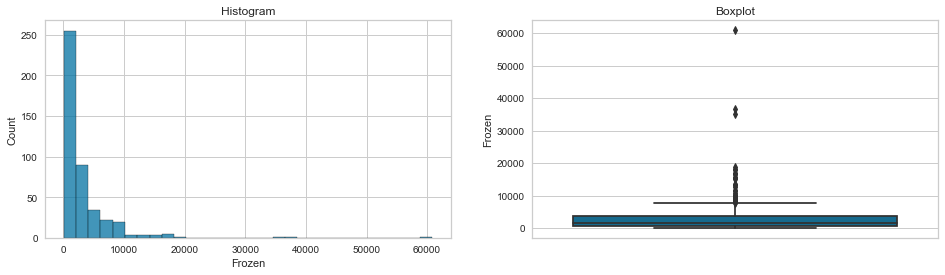


Column Detergents_Paper (Skewness 3.63)


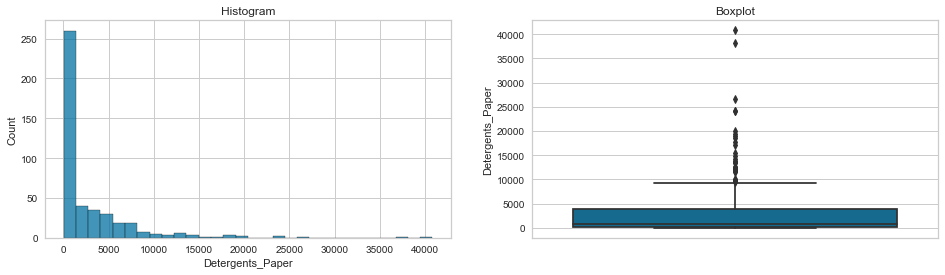


Column Delicatessen (Skewness 11.15)


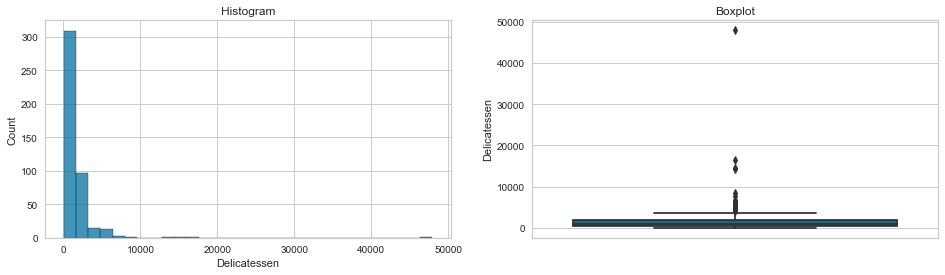

In [371]:
# Data Distribution and Check Data Outlier
for col in data_cls.drop(columns=['Channel','Region']).columns:
    print(f'\nColumn {col} (Skewness {round(data_cls[col].skew(),2)})')
    diagnostic_plots(data_cls, col)

Berdasarkan hasil diatas dapat diketahui bahwa pada semua kolom terdapat `Outlier` dan memiliki jenis distribusi data `Highly Right-Skew` (Skewness > 1)

In [372]:
# Define Column With Outlier
outlier_col = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicatessen']

# Create Censoring with IQR Method
winsor = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=outlier_col)
winsor.fit(data_cls)
cls_censored = winsor.transform(data_cls)

Melakukan `censoring` terhadap data outlier menggunakan metode `IQR` dan menggunakan `tail='right'` karena data memiliki jenis distribusi `Highly Right-Skew`


Column Fresh (Skewness 1.11)


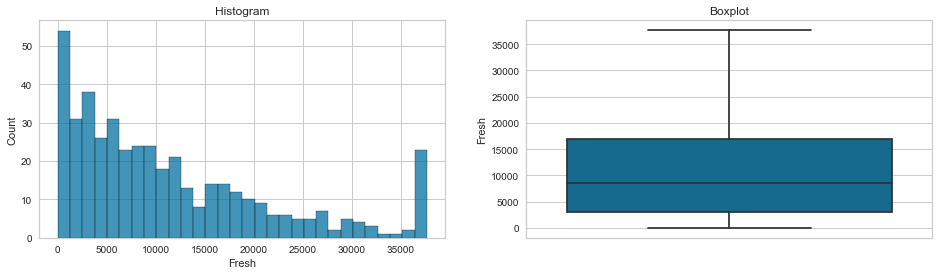


Column Milk (Skewness 1.11)


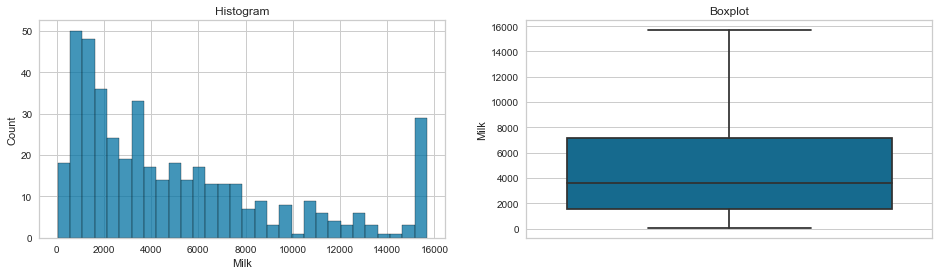


Column Grocery (Skewness 1.18)


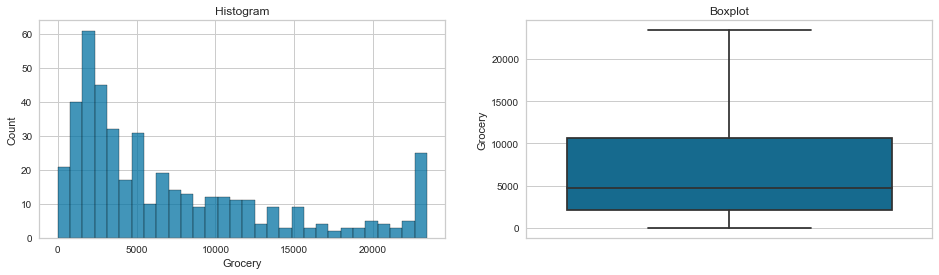


Column Frozen (Skewness 1.12)


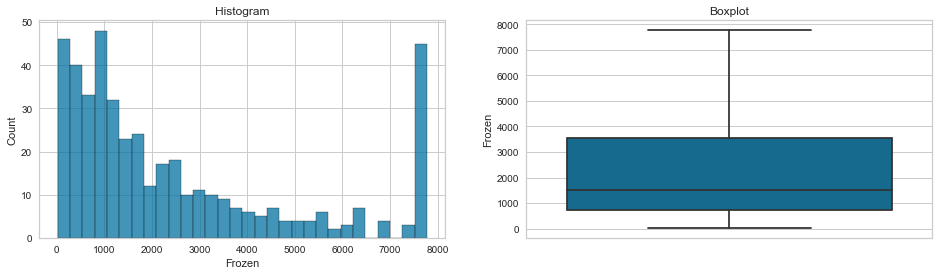


Column Detergents_Paper (Skewness 1.27)


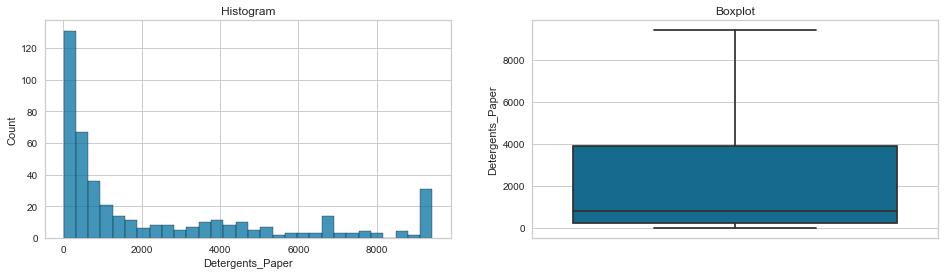


Column Delicatessen (Skewness 1.07)


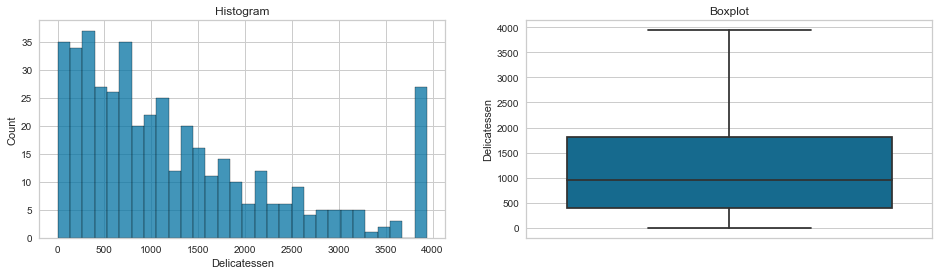

In [373]:
# Data Distribution and Check Data after Outlier Handling
for col in outlier_col:
    print(f'\nColumn {col} (Skewness {round(cls_censored[col].skew(),2)})')
    diagnostic_plots(cls_censored, col)

Berhasil melakukan `censoring` terhadap data outlier

In [374]:
# Update Data with Data no Outlier
data_cls_censored = data_cls.copy()

for col in outlier_col:
    data_cls_censored[col] = cls_censored[col]

Merubah nilai data Clustering tanpa outlier

### 5.2.2 Feature Scaling

In [375]:
data_cls_censored

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25
...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.0,7772.25,182.0,2204.0
436,1,3,37642.75,1431.0,764.0,4510.0,93.0,2346.0
437,2,3,14531.0,15488.0,23409.875,437.0,9419.875,1867.0
438,1,3,10290.0,1981.0,2232.0,1038.0,168.0,2125.0


In [376]:
# Define Numeric Columns With outlier_col Since All Numeric Columns Have Outlier
num_cols = outlier_col
data_cls_scaled=data_cls_censored.copy()

# Scaling Column with MinMaxScaler()
scaling_pipe = Pipeline([("scaler", MinMaxScaler())])

data_cls_scaled[num_cols] = scaling_pipe.fit_transform(data_cls_censored[num_cols])

Melakukan scaling terhadap data menggunakan `MinMaxScaler` karena data berdistribusi `Skew`

### 5.2.3 Model Definition

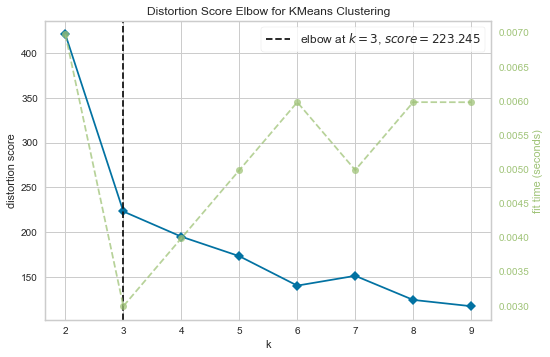

In [377]:
# FInd Best K With Elbow Method
find_k_elbow = KElbowVisualizer(KMeans(init="random", n_init=1,
                     algorithm="elkan", max_iter=100, random_state=27), k=(2,10))

find_k_elbow.fit(data_cls_scaled)
find_k_elbow.show()
plt.show()

Berdasarkan hasil pencarian jumlah cluster terbaik dengan Elbow Method didapatkan bahwa jumlah cluster `3` adalah yang paling optimal

In [378]:
# Create Function for Display Silohuette Score
def display_silohuette_score(kmeans_per_k, data, silhouette_scores):
    plt.figure(figsize=(20, 10))

    for k in (3, 4, 5, 6):
        plt.subplot(2, 2, k - 2)
    
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(data, y_pred)

        padding = len(data) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")
    
        if k in (5, 6):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)
    plt.show()

Silohuette Score K-Means


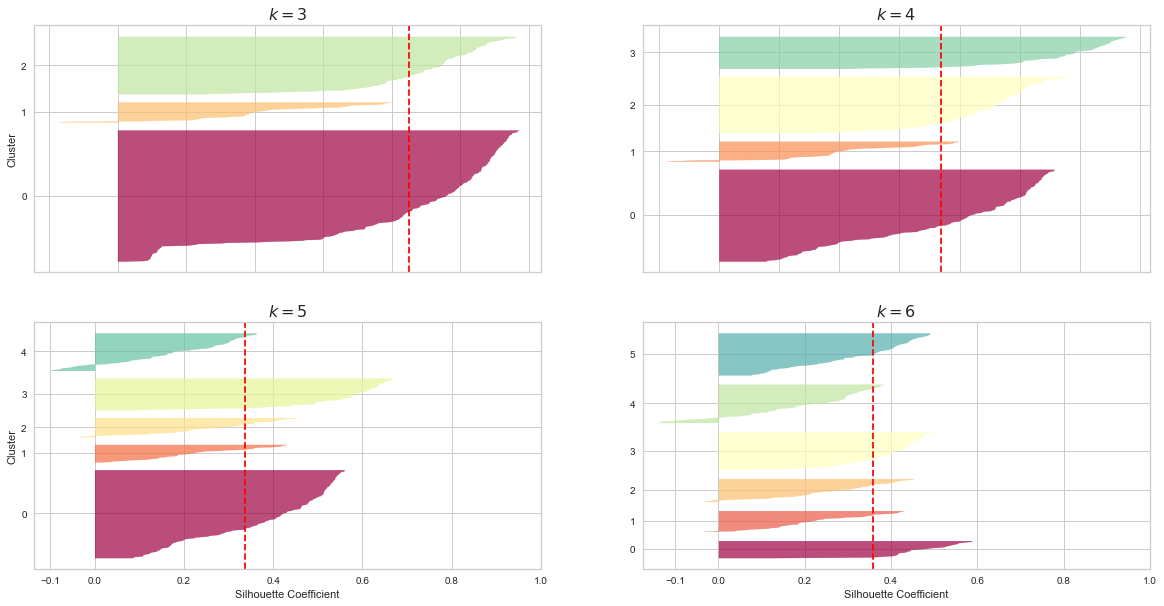

In [379]:
# Find Best K With Silohuette Score
find_k_sil = [KMeans(n_clusters=k,  n_init=1, algorithm="elkan", max_iter=100, random_state=27).fit(data_cls_scaled)
                for k in range(2, 10)]
inertias = [model.inertia_ for model in find_k_sil]

silhouette_scores = [silhouette_score(data_cls_scaled, model.labels_)
                     for model in find_k_sil[1:]]
                     
# Display Silohuette Score
print('Silohuette Score K-Means')
display_silohuette_score(find_k_sil, data_cls_scaled, silhouette_scores)

Berdasarkan hasil pencarian jumlah kluster terbaik dengan `Silohuette Score` ternyata jumlah klaster yang lebih optimal adalah `4` karena semua klaster tersebut melewati garis `Silohuette Score` dan sedikit kemungkinan terjadinya kesalahan clustering pada cluster `1`

In [380]:
# Show Inertia from K = 3
print('KMeans Inertia   : {:.2f}'.format(inertias[5]))

KMeans Inertia   : 127.54


Kesimpulannya adalah berdasarkan hasil evaluasi menggunakan `Elbow Method` dan `Silohuette Score` lebih baik jika memilih jumlah klaster sebanyak `4` dimana inertianya sebesar `127.54`

In [381]:
# K-Means Definition With Best K
km = KMeans(init="random", n_init=1, n_clusters=4, algorithm="elkan", max_iter=100, random_state=27)

Mendefinisikan model K-Means dengan jumlah K = 4

### 5.5.4. Model Training

In [382]:
# Fit Dataset with K-Means
km.fit(data_cls_scaled)

KMeans(algorithm='elkan', init='random', max_iter=100, n_clusters=4, n_init=1,
       random_state=27)

Melakukan pelatihan dataset menggunakan `KMeans`

### 5.5.3. Model Evaluation

In [383]:
# Predict Cluster
data_cls['Cluster_KM'] = km.predict(data_cls_scaled)
data_cls

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_KM
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,3
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.0,13135.0,182.0,2204.0,3
436,1,3,39228.0,1431.0,764.0,4510.0,93.0,2346.0,3
437,2,3,14531.0,15488.0,30243.0,437.0,14841.0,1867.0,0
438,1,3,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,1


Model berhasil mengeluarkan prediksi Cluster

In [384]:
data_cls.groupby(['Cluster_KM','Channel'])[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].mean()

Fresh          Milk       Grocery       Frozen  \
Cluster_KM Channel                                                          
0          2         9295.836066  10830.909836  16179.459016  1380.868852   
1          1        10071.627219   2479.573964   3409.526627   1469.56213   
2          1        12902.254237    3870.20339   4026.135593  3127.322034   
           2              5200.0       10784.0  18471.944444  2584.111111   
3          1        22176.842857   5446.057143   5242.357143  9773.014286   
           2             18361.0        3130.0        5728.0       9845.5   

                    Detergents_Paper  Delicatessen  
Cluster_KM Channel                                  
0          2             7238.680328   1730.811475  
1          1              720.378698    921.763314  
2          1              950.525424   1197.152542  
           2             8225.277778   1871.944444  
3          1              825.171429        2793.5  
           2                   548.0        2067.0

Berdasarkan hasil clustering menggunakan K-Means, dengan memperhatikan customer `Channel` dan annual spending pada seluruh produk dapat disimpulkan bahwa:
- Cluster 0 = Customer yang cenderung membeli banyak kebutuhan pokok dan hanya tertarik bertransaksi di Retail
- Cluster 1 = Customer yang cenderung membeli banyak kebutuhan makanan segar dan hanya tertarik bertransaksi di Horeca
- Cluster 2 = Customer Normal yang fleksibel dengan Channel manapun namun cenderung membeli banyak kebutuhan pokok di Retail dan cenderung membeli banyak kebutuhan makanan segar di Horeca
- Cluster 3 = Customer Normal yang fleksibel dengan Channel manapun namun cenderung membeli banyak kebutuhan makanan segar pada Horeca dan Retail

## 5.6. Split Data for Train Test and Inference

In [385]:
# Get Data for Model Inference

data_inference = data_cls.sample(10, random_state=27)
data_inference.reset_index(drop=True, inplace=True)
data_inference

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_KM
0,2,3,22925.0,73498.0,32114.0,987.0,20070.0,903.0,0
1,1,3,20918.0,1916.0,1573.0,1960.0,231.0,961.0,1
2,1,1,31614.0,489.0,1495.0,3242.0,111.0,615.0,2
3,1,3,11442.0,1032.0,582.0,5390.0,74.0,247.0,3
4,1,2,1182.0,3088.0,6114.0,978.0,821.0,1637.0,1
5,1,3,7388.0,1882.0,2174.0,720.0,47.0,537.0,1
6,1,3,97.0,3605.0,12400.0,98.0,2970.0,62.0,1
7,1,1,8885.0,2428.0,1777.0,1777.0,430.0,610.0,2
8,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,3
9,1,3,622.0,55.0,137.0,75.0,7.0,8.0,1


Membuat data inferensi untuk mengecek model apakah dapat melakukan prediksi klasifikasi menggunakan data baru. Data inferensi mengambil sejumlah 10 sampel data yang didapatkan secara random dari dataset

In [386]:
# Remove Inference-Set from Dataset

data_train_test = data_cls.drop(index=data_inference.index)
data_train_test.reset_index(drop=True, inplace=True)
data_train_test

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_KM
0,2,3,3366.0,5403.0,12974.0,4400.0,5977.0,1744.0,0
1,2,3,13146.0,1124.0,4523.0,1420.0,549.0,497.0,0
2,2,3,31714.0,12319.0,11757.0,287.0,3881.0,2931.0,0
3,2,3,21217.0,6208.0,14982.0,3095.0,6707.0,602.0,0
4,2,3,24653.0,9465.0,12091.0,294.0,5058.0,2168.0,0
...,...,...,...,...,...,...,...,...,...
425,1,3,29703.0,12051.0,16027.0,13135.0,182.0,2204.0,3
426,1,3,39228.0,1431.0,764.0,4510.0,93.0,2346.0,3
427,2,3,14531.0,15488.0,30243.0,437.0,14841.0,1867.0,0
428,1,3,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,1


Menghapus data Inference dari data Train Test

## 5.7. Outlier Handling

In [387]:
# Censoring With Winsorizer From Clustering Process
train_test_censored = winsor.fit_transform(data_train_test[outlier_col])

Melakukan `censoring` menggunakan variabel Winsorizer pada tahap clustering dan melakukan fit ulang dengan `data_train_test` terhadap data outlier menggunakan metode `IQR` dan menggunakan `tail='right'` karena data memiliki jenis distribusi `Right-Skew`


Column Fresh (Skewness 1.1)


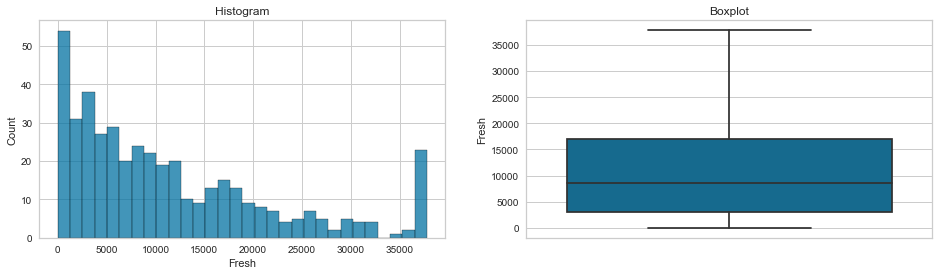


Column Milk (Skewness 1.12)


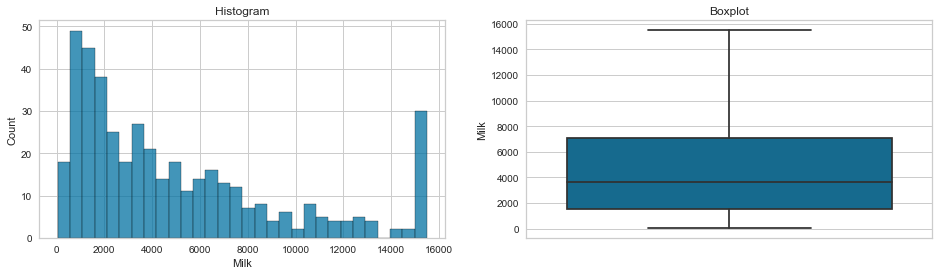


Column Grocery (Skewness 1.19)


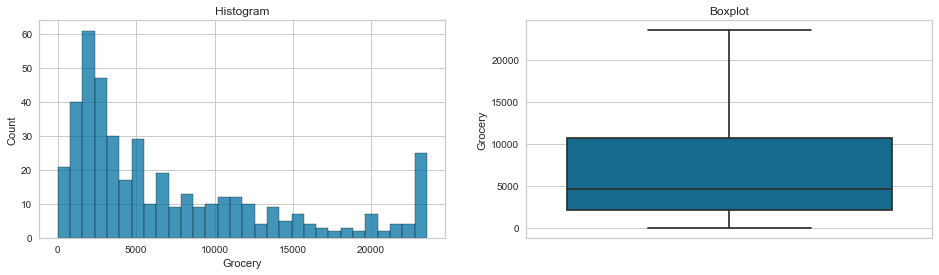


Column Frozen (Skewness 1.12)


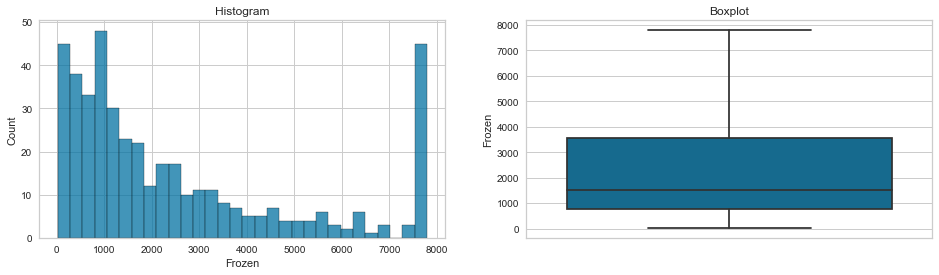


Column Detergents_Paper (Skewness 1.29)


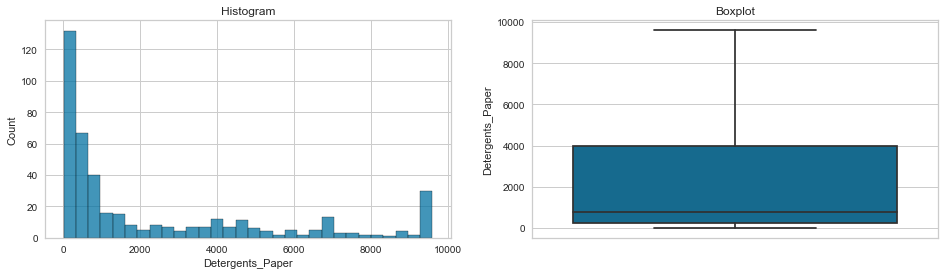


Column Delicatessen (Skewness 1.05)


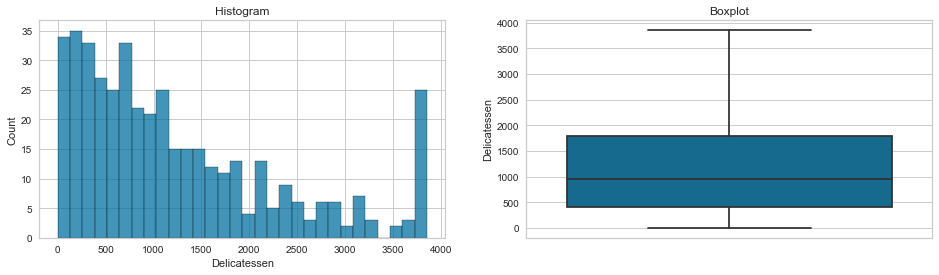

In [388]:
# Data Distribution and Check Data after Outlier Handling
for col in outlier_col:
    print(f'\nColumn {col} (Skewness {round(train_test_censored[col].skew(),2)})')
    diagnostic_plots(train_test_censored, col)

Berhasil melakukan `censoring` terhadap data outlier pada `data_train_test`

In [389]:
# Update Data with Data no Outlier
data_train_test_censored = data_train_test.copy()

for col in outlier_col:
    data_train_test_censored[col] = train_test_censored[col]

## 5.8. Feature Engineering

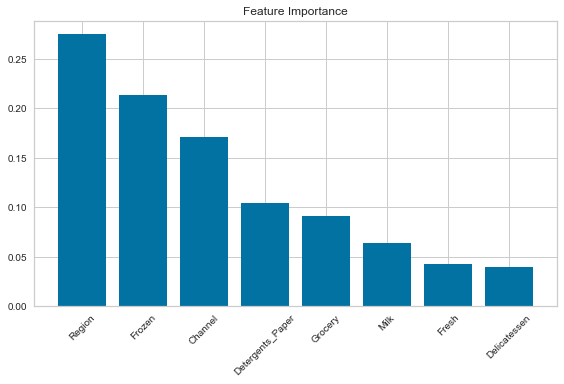

In [390]:
# Feature Engineering With Random Forest
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=27)
rnd_clf.fit(data_train_test.drop(columns='Cluster_KM'), data_train_test['Cluster_KM'])

importances = rnd_clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(data_train_test.drop(columns='Cluster_KM').shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(data_train_test.drop(columns='Cluster_KM').shape[1]), data_train_test.drop(columns='Cluster_KM').columns[sorted_indices], rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan hasil diatas, kolom `Delicatessen` dan `Fresh` tidak terlalu penting untuk proses prediksi

In [391]:
# Drop Column
data_train_test_censored.drop(columns=['Delicatessen','Fresh'], inplace=True)
final_col = data_train_test_censored.columns.tolist()

# Save Data Frame
data_train_test_censored.to_csv('Wholesale customers data (New).csv') 

Menghapus kolom dari hasil seleksi Feature Selection

## 5.9. Split Data

### 5.9.1. Split Data and Target

In [392]:
# Split Data and Target

X = data_train_test_censored.drop(columns='Cluster_KM')
y = data_train_test_censored['Cluster_KM']

Memisahkan antara data dan target klasifikasi

In [393]:
# Check cluster balance
y.value_counts()

1    168
0    114
2     77
3     71
Name: Cluster_KM, dtype: int64

Berdasarkan pengecekan perbandingan jumlah cluster pada data, dinyatakan bahwa data tersebut `unbalance`

In [394]:
# Balancing data
X_resampled, y_resampled = SMOTENC(categorical_features=[0, 1],sampling_strategy='not majority', random_state=27).fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled.value_counts()

0    168
1    168
3    168
2    168
Name: Cluster_KM, dtype: int64

Setelah melakukan balancing data menggunakan sampling_strategy='not majority' sekarang jumlah setiap cluster sudah seimbang

### 5.9.2. Split Train-Set, Test-Set, and Validation-Set

### A. Imbalance Data

In [395]:
# Split Data Into Train + Validation Set and Test-Set

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=27)

# Split Train + Validation Set into Train-Set and Validation-Set

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=27)

### B. Balance Data

In [396]:
# Split Data Into Train-Set Test-Set

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled, y_resampled, random_state=27)

Memisahkan antara Train-Set, Test-Set, dan Validation-Set dengan data Imbalance dan data Balance

## 5.10. Feature Scaling

In [397]:
# Scaling for Data Imbalance
num_col = ['Milk','Grocery','Frozen','Detergents_Paper']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_valid_scaled = X_valid.copy()

placement_tr = scaling_pipe.fit_transform(X_train[num_col])
trnsfrm_pipe = ColumnTransformer([("num", scaling_pipe, num_col)])

train_prepared = trnsfrm_pipe.fit_transform(X_train)
test_prepared = trnsfrm_pipe.transform(X_test)
valid_prepared = trnsfrm_pipe.transform(X_valid)

In [398]:
# Scaling for Data Balance
X_train_bal_scaled = X_train_bal.copy()
X_test_bal_scaled = X_test_bal.copy()

train_prepared_bal = trnsfrm_pipe.transform(X_train_bal)
test_prepared_bal = trnsfrm_pipe.transform(X_test_bal)

Melakukan scaling dengan pipeline scaler pada clustering dengan data Imbalance dan Balance

# 6. Model Definition

In [399]:
# Set Parameter For Grid Search With Logistic Regression

param_grid_lr = {'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}

# Grid Search For Logistic Regression

grid_search_lr = GridSearchCV(LogisticRegression(random_state=27), param_grid_lr, cv=5,
                          return_train_score=True)

grid_search_lr.fit(valid_prepared, y_valid)
print('Best Logistic Regression C Parameters           :',grid_search_lr.best_params_['C'])
print("Best Logistic Regression Cross Validation Score : {:.2f}".format(grid_search_lr.best_score_))

Best Logistic Regression C Parameters           : 10.0
Best Logistic Regression Cross Validation Score : 0.72


Parameter terbaik untuk Logistic Regression berdasarkan Grid Search dan Cross Validation adalah `C` = `10.0` diantara `0.001`, `0.01`, `0.05`, `0.1`, `0.5`, `1.0`, dan `10.0` dengan Cross Validation Score `0.72`

In [400]:
# Set Parameter For Grid Search With Decision Tree

param_grid_dt = {'criterion': ['gini','entropy'],
              'max_depth': [2,3,4,5]}

# Grid Search For Decision Tree

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=27), param_grid_dt, cv=5,
                          return_train_score=True)

grid_search_dt.fit(X_valid, y_valid)
print('Best Decision Tree criterion Parameters    :',grid_search_dt.best_params_['criterion'])
print('Best Decision Tree max_depth Parameters    :',grid_search_dt.best_params_['max_depth'])
print("Best Decision Tree Cross Validation Score  : {:.2f}".format(grid_search_dt.best_score_))

Best Decision Tree criterion Parameters    : gini
Best Decision Tree max_depth Parameters    : 3
Best Decision Tree Cross Validation Score  : 0.97


Parameter terbaik untuk Decision Tree berdasarkan Grid Search dan Cross Validation adalah:
- `criterion` = `gini` diantara `gini` dan `entropy`
- `max_depth ` = `3` diantara `2`, `3`, `4`, dan `5`

Dengan Cross Validation Score `0.97`

In [401]:
# Set Parameter For Grid Search With Random Forest

param_grid_rf = {'n_estimators': [100, 200, 300, 400, 500],
              'max_leaf_nodes': [4, 8, 12, 16, 20, 24],
              'criterion': ['gini','entropy']}

# Grid Search For Random Forest

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=27), param_grid_rf, cv=5,
                          return_train_score=True)

grid_search_rf.fit(X_valid, y_valid)
print('Best Random Forest n_estimators Parameters   :',grid_search_rf.best_params_['n_estimators'])
print('Best Random Forest max_leaf_nodes Parameters :',grid_search_rf.best_params_['max_leaf_nodes'])
print('Best Random Forest criterion Parameters      :',grid_search_rf.best_params_['criterion'])
print("Best Random Forest Cross Validation Score    : {:.2f}".format(grid_search_rf.best_score_))

Best Random Forest n_estimators Parameters   : 100
Best Random Forest max_leaf_nodes Parameters : 12
Best Random Forest criterion Parameters      : entropy
Best Random Forest Cross Validation Score    : 0.98


Parameter terbaik untuk Random Forest berdasarkan Grid Search dan Cross Validation adalah:
- `n_estimators` = `100` diantara `100`, `200`, `300`, `400`, dan `500`
- `max_leaf_nodes` = `12` diantara `4`, `8`, `12`, `16`, `20`, dan `24`
- `criterion` = `entropy` diantara `gini` dan `entropy`

Dengan Cross Validation Score `0.98`

In [402]:
# Model Definition for Imbalance Data
lr = Pipeline([("transform", trnsfrm_pipe), ("lr", LogisticRegression(C=grid_search_lr.best_params_['C'],
                                                                     random_state=27))])
dt = Pipeline([("dt", DecisionTreeClassifier(criterion=grid_search_dt.best_params_['criterion'],
                                                                         max_depth=grid_search_dt.best_params_['max_depth'],
                                                                         random_state=27))])
rf = Pipeline([("rf", RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                                                         max_leaf_nodes=grid_search_rf.best_params_['max_leaf_nodes'],
                                                                         criterion=grid_search_rf.best_params_['criterion'],
                                                                         random_state=27))])

# Model Definition for Balance Data
lr_bal = Pipeline([("transform", trnsfrm_pipe), ("lr", LogisticRegression(C=grid_search_lr.best_params_['C'],
                                                                     random_state=27))])
dt_bal = Pipeline([("dt", DecisionTreeClassifier(criterion=grid_search_dt.best_params_['criterion'],
                                                                         max_depth=grid_search_dt.best_params_['max_depth'],
                                                                         random_state=27))])
rf_bal = Pipeline([("rf", RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                                                         max_leaf_nodes=grid_search_rf.best_params_['max_leaf_nodes'],
                                                                         criterion=grid_search_rf.best_params_['criterion'],
                                                                         random_state=27))])

Model definition menggunakan best parameter dari Grid Search, dalam hal ini model Random Forest memiliki Cross Validation Score tertinggi yaitu `0.98`

# 7. Model Training

In [403]:
# Train Model Logistic Regression, Decision Tree, and Random Forest with Imbalance Data
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

# Train Model Logistic Regression, Decision Tree, and Random Forest with Balance Data
lr_bal.fit(X_train_bal,y_train_bal)
dt_bal.fit(X_train_bal,y_train_bal)
rf_bal.fit(X_train_bal,y_train_bal)

Pipeline(steps=[('rf',
                 RandomForestClassifier(criterion='entropy', max_leaf_nodes=12,
                                        random_state=27))])

Melakukan pelatihan pada setiap model menggunakan data dari `Train-Set`

# 8. Model Evaluation

In [404]:
# Predict Imbalance Train-Set and Test-Set

# Logistic Regression
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

# Decision Tree
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Random Forest
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)


# Predict Balance Train-Set and Test-Set

# Logistic Regression
y_pred_train_lr_bal = lr_bal.predict(X_train_bal)
y_pred_test_lr_bal = lr_bal.predict(X_test_bal)

# Decision Tree
y_pred_train_dt_bal = dt_bal.predict(X_train_bal)
y_pred_test_dt_bal = dt_bal.predict(X_test_bal)

# Random Forest
y_pred_train_rf_bal = rf_bal.predict(X_train_bal)
y_pred_test_rf_bal = rf_bal.predict(X_test_bal)

## 8.1. Classification Report

### 8.1.1. Logistic Regression

### A. Train-Set

In [405]:
# Display Classification Report Train-Set Logistic Regression

print('Classification Report Train-Set Logistic Regression Imbalance Data:')
print(print(classification_report(y_train,y_pred_train_lr)))
print('==========================================================')
print('Classification Report Train-Set Logistic Regression Balance Data:')
print(classification_report(y_train_bal,y_pred_train_lr_bal))

Classification Report Train-Set Logistic Regression Imbalance Data:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        62
           1       0.73      0.94      0.82        96
           2       0.31      0.10      0.15        49
           3       0.76      0.82      0.79        34

    accuracy                           0.72       241
   macro avg       0.64      0.67      0.64       241
weighted avg       0.66      0.72      0.67       241

None
Classification Report Train-Set Logistic Regression Balance Data:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       129
           1       0.63      0.79      0.70       124
           2       0.33      0.20      0.25       125
           3       0.82      0.90      0.86       126

    accuracy                           0.67       504
   macro avg       0.64      0.67      0.65       504
weighted avg       0.64      0.67      0.65   

### B. Test-Set

In [406]:
# Display Classification Report Test-Set Logistic Regression

print('Classification Report Test-Set Logistic Regression Imbalance Data:')
print(classification_report(y_test,y_pred_test_lr))
print('==========================================================')
print('Classification Report Test-Set Logistic Regression Balance Data:')
print(classification_report(y_test_bal,y_pred_test_lr_bal))

Classification Report Test-Set Logistic Regression Imbalance Data:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.79      0.95      0.86        40
           2       0.14      0.07      0.10        14
           3       0.94      0.67      0.78        24

    accuracy                           0.75       108
   macro avg       0.65      0.64      0.63       108
weighted avg       0.72      0.75      0.72       108

Classification Report Test-Set Logistic Regression Balance Data:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68        39
           1       0.67      0.77      0.72        44
           2       0.19      0.12      0.14        43
           3       0.74      0.88      0.80        42

    accuracy                           0.61       168
   macro avg       0.56      0.62      0.59       168
weighted avg       0.56      0.61      0.58       168

Berdasarkan hasil diatas dapat disimpulkan bahwa model Logistic Regression:
- Hasil Prediksi Train-Set dan Test-Set dengan Imbalance data memiliki hasil akurasi yang cukup tinggi tetapi `underfit`, namun nilai akurasi tersebut tidak relevan karena nilai recall pada kategori 3 yang kurang baik
- Setelah melakukan Balancing data, hasil precision, recall, dan accuracy lebih baik dan lebih merata namun tetap `underfit`
- Model Logistic Regression yang dilatih dengan data Imbalance dan Balance merupakan model yang kurang baik untuk dataset ini

### 8.1.2. Decision Tree

### A. Train-Set

In [407]:
# Display Classification Report Train-Set Decision Tree

print('Classification Report Train-Set Decision Tree Imbalance Data:')
print(classification_report(y_train,y_pred_train_dt))
print('==========================================================')
print('Classification Report Train-Set Decision Tree Balance Data:')
print(classification_report(y_train_bal,y_pred_train_dt_bal))

Classification Report Train-Set Decision Tree Imbalance Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.99      0.98      0.98        96
           2       1.00      1.00      1.00        49
           3       0.94      0.97      0.96        34

    accuracy                           0.99       241
   macro avg       0.98      0.99      0.99       241
weighted avg       0.99      0.99      0.99       241

Classification Report Train-Set Decision Tree Balance Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.95      0.99      0.97       124
           2       1.00      1.00      1.00       125
           3       0.99      0.94      0.97       126

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



### B. Test-Set

In [408]:
# Display Classification Report Test-Set Decision Tree

print('Classification Report Test-Set Decision Tree Imbalance Data:')
print(classification_report(y_test,y_pred_test_dt,zero_division=1))
print('==========================================================')
print('Classification Report Test-Set Decision Tree Balance Data:')
print(classification_report(y_test_bal,y_pred_test_dt_bal))

Classification Report Test-Set Decision Tree Imbalance Data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.93      1.00      0.96        40
           2       1.00      1.00      1.00        14
           3       1.00      0.79      0.88        24

    accuracy                           0.95       108
   macro avg       0.97      0.95      0.95       108
weighted avg       0.96      0.95      0.95       108

Classification Report Test-Set Decision Tree Balance Data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.91      0.98      0.95        44
           2       1.00      1.00      1.00        43
           3       0.95      0.90      0.93        42

    accuracy                           0.96       168
   macro avg       0.97      0.96      0.96       168
weighted avg       0.97      0.96      0.96       168



Berdasarkan hasil diatas dapat disimpulkan bahwa model Decision Tree:
- Hasil Prediksi Train-Set dan Test-Set dengan Imbalance data memiliki hasil akurasi yang tinggi tetapi `underfit`, namun nilai akurasi tersebut tidak relevan karena nilai recall pada kategori 3 yang kurang baik
- Setelah melakukan Balancing data, hasil precision, recall, dan accuracy lebih baik dan lebih merata
- Model Decision Tree yang dilatih dengan data Balance serta menggunakan tuning parameter yang sama merupakan model yang lebih baik meskipun hanya memiliki hasil akurasi yang lebih tinggi pada Test-Set dari Model Decision Tree yang dilatih dengan data Imbalance

### 8.1.3. Random Forest

### A. Train-Set

In [409]:
# Display Classification Report Train-Set Random Forest

print('Classification Report Train-Set Random Forest Imbalance Data:')
print(classification_report(y_train,y_pred_train_rf))
print('==========================================================')
print('Classification Report Train-Set Random Forest Balance Data:')
print(classification_report(y_train_bal,y_pred_train_rf_bal))

Classification Report Train-Set Random Forest Imbalance Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        34

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Classification Report Train-Set Random Forest Balance Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.98      0.99      0.99       124
           2       1.00      1.00      1.00       125
           3       0.99      0.98      0.99       126

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



### B. Test-Set

In [410]:
# Display Classification Report Test-Set and Test-Set Random Forest

print('Classification Report Test-Set Random Forest Imbalance Data:')
print(classification_report(y_test,y_pred_test_rf))
print('==========================================================')
print('Classification Report Test-Set Random Forest Balance Data:')
print(classification_report(y_test_bal,y_pred_test_rf_bal))

Classification Report Test-Set Random Forest Imbalance Data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.89      1.00      0.94        40
           2       1.00      1.00      1.00        14
           3       1.00      0.71      0.83        24

    accuracy                           0.94       108
   macro avg       0.96      0.93      0.93       108
weighted avg       0.94      0.94      0.93       108

Classification Report Test-Set Random Forest Balance Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.93      0.98      0.96        44
           2       1.00      1.00      1.00        43
           3       0.97      0.93      0.95        42

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



Berdasarkan hasil diatas dapat disimpulkan bahwa model Random Forest:
- Hasil Prediksi Train-Set dan Test-Set dengan Imbalance data memiliki hasil akurasi yang tinggi tetapi `underfit`, namun nilai akurasi tersebut tidak relevan karena nilai recall pada kategori 3 yang kurang baik
- Setelah melakukan Balancing data, hasil precision, recall, dan accuracy lebih baik dan lebih merata
- Model Random Forest yang dilatih dengan data Balance serta menggunakan tuning parameter yang sama merupakan model yang lebih baik meskipun hanya memiliki hasil akurasi yang lebih tinggi pada Test-Set dari Model Random Forest yang dilatih dengan data Imbalance

Berdasarkan hasil evaluasi 3 model diatas, model yang lebih cocok untuk diimplementasikan dalam proses Inferensi adalah model `Random Forest` yang dilatih menggunakan data `Balance` karena memiliki nilai akurasi tertinggi pada Test-Set yaitu sebesar `0.98` dan memiliki nilai precision serta recall yang lebih merata

# 9.Model Inference

## 9.1. Inferencing

In [411]:
# Display `data_inference`

data_inference

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_KM
0,2,3,22925.0,73498.0,32114.0,987.0,20070.0,903.0,0
1,1,3,20918.0,1916.0,1573.0,1960.0,231.0,961.0,1
2,1,1,31614.0,489.0,1495.0,3242.0,111.0,615.0,2
3,1,3,11442.0,1032.0,582.0,5390.0,74.0,247.0,3
4,1,2,1182.0,3088.0,6114.0,978.0,821.0,1637.0,1
5,1,3,7388.0,1882.0,2174.0,720.0,47.0,537.0,1
6,1,3,97.0,3605.0,12400.0,98.0,2970.0,62.0,1
7,1,1,8885.0,2428.0,1777.0,1777.0,430.0,610.0,2
8,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,3
9,1,3,622.0,55.0,137.0,75.0,7.0,8.0,1


Menampilkan data yang akan digunakan pada proses `Inference`

In [412]:
# Split Data and Target on Data Inference

X_inf = data_inference[final_col].drop(columns='Cluster_KM')
y_inf = data_inference['Cluster_KM']

In [413]:
# Try predict With Logistic Regression

data_inference['Predict'] = rf_bal.predict(X_inf)
data_inference

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_KM,Predict
0,2,3,22925.0,73498.0,32114.0,987.0,20070.0,903.0,0,0
1,1,3,20918.0,1916.0,1573.0,1960.0,231.0,961.0,1,1
2,1,1,31614.0,489.0,1495.0,3242.0,111.0,615.0,2,2
3,1,3,11442.0,1032.0,582.0,5390.0,74.0,247.0,3,3
4,1,2,1182.0,3088.0,6114.0,978.0,821.0,1637.0,1,1
5,1,3,7388.0,1882.0,2174.0,720.0,47.0,537.0,1,1
6,1,3,97.0,3605.0,12400.0,98.0,2970.0,62.0,1,1
7,1,1,8885.0,2428.0,1777.0,1777.0,430.0,610.0,2,2
8,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,3,3
9,1,3,622.0,55.0,137.0,75.0,7.0,8.0,1,1


Model Logistic Regression mampu melakukan prediksi menggunakan data baru

In [414]:
# Save Model

joblib.dump(rf_bal, "deployment\model.pkl")

['deployment\\model.pkl']

Menyimpan model pada file model.pkl agar dapat di deploy

# 10. Pengambilan Kesimpulan

Berdasarkan EDA:
- Terdapat `440` entri data customer dan terdapat `8` kolom serta tidak ada `Missing Values`
- Terdapat 2 Channel (Horeca dan Retail), 3 Region (Lisbon, Oporto, dan Other), dan 6 segmen produk (Fresh, Milk, Grocery, Frozen, Detergents_Paper, dan Delicatessen dimana produk `Fresh` selalu memberikan customer annual spending tertinggi di setiap region dan channel, sedangkan produk `Delicatessen` selalu memberikan customer annual spending terendah
- Customer terbanyak ada pada `Region` Other karena merupakan gabungan dari beberapa region lain, dan yang paling sedikit pada Oporto
- Diasumsikan bahwa sebagian besar customer di Portugal merupakan turis dan masyarakat yang lebih gemar bertransaksi di `Channel` `Horeca`
- Customer lebih banyak spending pada `Channel` Horeca dengan total annual spend sebesar `54.72%` sedangkan untuk `Channel` Retail hanya `45.28%` dimana hal tersebut disebabkan oleh lebih banyaknya customer pada `Channel` Horeca daripada Retail. Diasumsikan customer pada `Channel` Horeca adalah gabungan dari masyarakat dan turis
- Pada `Channel` Horeca, total customer annual spending pada produk `Fresh` lah yang paling besar, dan untuk produk yang lainnya terlampau jauh dibawahnya (dibawah dari `50%` total anual spending pada produk `Fresh`)
- Pada `Channel` Retail, total customer annual spending pada produk `Grocery` lah yang paling besar, dimana total annual spending pada produk `Fresh`, `Milk`, dan `Detergen_Paper` tidak terlalu jauh perbedaannya, namun produk `Frozen` dan `Delicatesseen` memiliki total customer annual spending yang paling rendah

Berdasarkan Data Preprocessing:
- Semua kolom memiliki `Outlier` dan memiliki jenis distribusi data `Highly Right-Skew` (Skewness > 1)
- Jumlah cluster terbaik dengan Elbow Method didapatkan bahwa jumlah cluster `3` adalah yang paling optimal sedangkan berdasarkan `Silohuette Score` ternyata jumlah klaster yang lebih optimal adalah `4` karena semua klaster tersebut melewati garis `Silohuette Score` dan sedikit kemungkinan terjadinya kesalahan clustering pada cluster `1`, sehingga lebih baik jika memilih jumlah klaster sebanyak `4` dengan model clustering K-Means dimana inertianya sebesar `127.54`
- Berdasarkan hasil clustering menggunakan K-Means, dengan memperhatikan customer `Channel` dan annual spending pada seluruh produk dapat disimpulkan bahwa, Cluster 0 = Customer yang cenderung membeli banyak kebutuhan pokok dan hanya tertarik bertransaksi di Retail, Cluster 1 = Customer yang cenderung membeli banyak kebutuhan makanan segar dan hanya tertarik bertransaksi di Horeca, Cluster 2 = Customer Normal yang fleksibel dengan Channel manapun namun cenderung membeli banyak kebutuhan pokok di Retail dan cenderung membeli banyak kebutuhan makanan segar di Horeca, Cluster 3 = Customer Normal yang fleksibel dengan Channel manapun namun cenderung membeli banyak kebutuhan makanan segar pada Horeca dan Retail
- Kolom `Delicatessen` dan `Fresh` tidak terlalu penting untuk proses prediksi
- Terjadi `unbalance` pada jumlah tiap klaster

Kesimpulan berdasarkan Model yang dibangun:
- Parameter terbaik untuk Logistic Regression berdasarkan Grid Search dan Cross Validation adalah `C` = `10.0` diantara `0.001`, `0.01`, `0.05`, `0.1`, `0.5`, `1.0`, dan `10.0` dengan Cross Validation Score `0.72`
- Parameter terbaik untuk Decision Tree berdasarkan Grid Search dan Cross Validation adalah `criterion` = `gini` diantara `gini` dan `entropy` serta `max_depth ` = `3` diantara `2`, `3`, `4`, dan `5` dengan Cross Validation Score `0.97`
- Parameter terbaik untuk Random Forest berdasarkan Grid Search dan Cross Validation adalah `n_estimators` = `100` diantara `100`, `200`, `300`, `400`, dan `500`; `max_leaf_nodes` = `12` diantara `4`, `8`, `12`, `16`, `20`, dan `24`; `criterion` = `entropy` diantara `gini` dan `entropy` dengan Cross Validation Score `0.98`
- Model Random Forest memiliki Cross Validation Score tertinggi yaitu `0.98`
- Melakukan Balancing terhadap data memberikan efek yang baik terhadap hasil prediksi model dimana nilai precision, recall, dan accuracy menjadi lebih merata daripada menggunakan data Imbalance namun menghasilkan nilai accuracy yang lebih tinggi
- Model yang lebih cocok untuk diimplementasikan dalam proses Inferensi adalah model `Random Forest` yang dilatih menggunakan data `Balance` karena memiliki nilai akurasi tertinggi pada Test-Set yaitu sebesar `0.98`

Beberapa alasan yang mungkin menjadi penyebab model yang dibangun perlu dikembangkan lagi untuk diimplementasikan:
- Sedikitnya jumlah data dan kolom
- Feature Selection yang lebih sesuai

Sarannya adalah menggunakan data yang lebih banyak dan memiliki kolom yang lebih banyak pula, sehingga dapat menghasilkan Cluster serta Classification yang lebih baik